<a href="https://colab.research.google.com/github/Bambillo1/Python-Projects/blob/main/CNN%2C_RF%2C_CNN_RF_for_Energy_Theft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pTpBfO1CwStFodOtIn_uzzNOWpAmQn_8
From (redirected): https://drive.google.com/uc?id=1pTpBfO1CwStFodOtIn_uzzNOWpAmQn_8&confirm=t&uuid=78de17f7-c4dc-4549-844a-5a7caf7b42b4
To: /content/data.csv
100% 175M/175M [00:02<00:00, 68.9MB/s]
                            CONS_NO  FLAG  2014/1/1  2014/1/10  2014/1/11  \
0  0387DD8A07E07FDA6271170F86AD9151     1       NaN        NaN        NaN   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1       NaN        NaN        NaN   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1       NaN        NaN        NaN   
3  B32AC8CC6D5D805AC053557AB05F5343     1       NaN        NaN        NaN   
4  EDFC78B07BA2908B3395C4EB2304665E     1      2.90       3.42       3.81

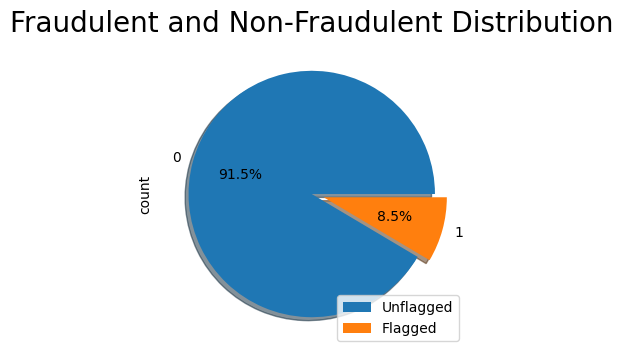

           Total   Percent
2014/10/3  42357  0.999646
2014/3/19  21505  0.507529
2014/2/28  20985  0.495256
2014/3/4   20820  0.491362
2014/3/3   20806  0.491032
...          ...       ...
2016/9/11    364  0.008591
2016/9/9     345  0.008142
2016/9/8     328  0.007741
FLAG           0  0.000000
CONS_NO        0  0.000000

[1036 rows x 2 columns]


<ipython-input-2-5ee2f2390efa>:85: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear', limit_direction='both')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1034, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1034, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,117,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,117,889 (8.08 MB)

 Trainable params: 2,117,889 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

727/727 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11668
           1       1.00      0.99      0.99     11587

    accuracy                           0.99     23255
   macro avg       0.99      0.99      0.99     23255
weighted avg       0.99      0.99      0.99     23255



AttributeError: module 'keras.api.backend' has no attribute 'function'

In [2]:
# -*- coding: utf-8 -*-
"""Energy Theft Detection with CNN and Random Forest Ensemble using SMOTE for Imbalanced Data."""

# ====================
# Import Libraries
# ====================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from tabulate import tabulate
from scipy import interpolate
#from plot_metric.functions import BinaryClassification

# ====================
# Load Data
# ====================
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Download dataset
!gdown --id 1pTpBfO1CwStFodOtIn_uzzNOWpAmQn_8

# Load dataset
df = pd.read_csv('data.csv')

# ====================
# Data Exploration
# ====================
# Check first 10 rows
print(df.head(10))

# Proportion of flagged (1) and unflagged (0) customers
num_flagged = df[df['FLAG'] == 1].shape[0]
num_unflagged = df[df['FLAG'] == 0].shape[0]

print(f'{num_flagged} customers flagged.')
print(f'{num_unflagged} customers unflagged.')

# Visualize the proportion with a pie chart
df["FLAG"].value_counts().plot(kind='pie', explode=[0, 0.1], figsize=(4, 4), autopct='%1.1f%%', shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution", fontsize=20)
plt.legend(["Unflagged", "Flagged"])
plt.show()

# Check for missing data
def missing_data_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

print(missing_data_all(df))

# ====================
# Data Preprocessing
# ====================
# Select columns excluding 'CONS_NO' and 'FLAG'
columns_to_select = [col for col in df.columns if col not in ['CONS_NO', 'FLAG']]

# Convert column names to datetime format
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in columns_to_select]
sorted_dates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in sorted(dates)]

# Reorganize columns
df.columns = ['CONS_NO', 'FLAG'] + sorted_dates

# Handle missing values
df = df.interpolate(method='linear', limit_direction='both')

# Split data into features (X) and target (Y)
X = df.drop(['CONS_NO', 'FLAG'], axis=1)
Y = df['FLAG']

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Oversample minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Reshape data for CNN input
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# ====================
# Build CNN Model
# ====================
input_shape = x_train.shape[1]

# Define CNN model
inputs = Input(shape=(input_shape, 1))
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(inputs)
x = Flatten()(x)
x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.4)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_cnn = Model(inputs=inputs, outputs=outputs)
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.summary()

# Train CNN model
history = model_cnn.fit(x_train, y_train, epochs=50, batch_size=30, verbose=0, validation_split=0.3)

# Make predictions with CNN
cnn_predictions = model_cnn.predict(x_test)

# Evaluate CNN model
print(classification_report(y_test, (cnn_predictions > 0.5).astype(int)))



125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       764
           1       1.00      0.98      0.99       736

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       764
           1       1.00      0.98      0.99       736

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



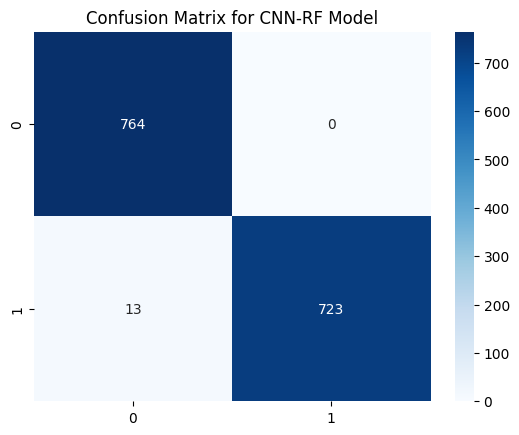

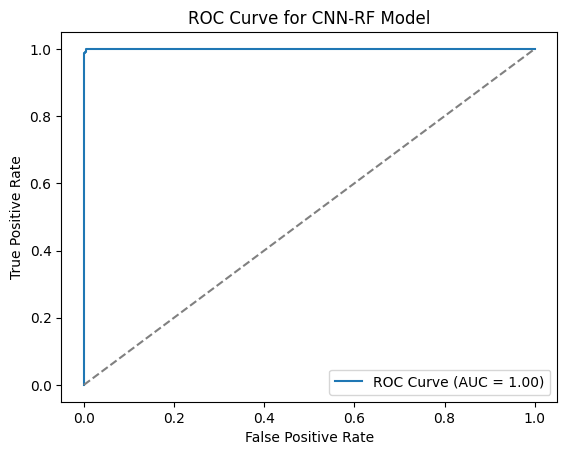

In [4]:
# ====================


# Extract features using tf.keras.Model
feature_extractor = Model(inputs=model_cnn.input, outputs=model_cnn.layers[1].output)

# Get feature maps for training and testing data
train_features = feature_extractor.predict(x_train[:4000])
test_features = feature_extractor.predict(x_test[:1500])

# Reshape features for Random Forest
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)


# ====================
# Train Random Forest Model
# ====================
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(train_features, y_train[:4000])

# Evaluate Random Forest model
rf_predictions = rf.predict(test_features)
print(classification_report(y_test[:1500], rf_predictions))

# ====================
# Combine CNN and RF Predictions
# ====================
cnn_weight = 0.3
rf_weight = 0.7

# Combine predictions using weighted averaging
cnn_rf_predictions = (cnn_weight * cnn_predictions[:1500].flatten() + rf_weight * rf_predictions)

# Evaluate combined model
print(classification_report(y_test[:1500], (cnn_rf_predictions > 0.5).astype(int)))

# ====================
# Visualize Results
# ====================
# Plot confusion matrix for CNN-RF model
cm = confusion_matrix(y_test[:1500], (cnn_rf_predictions > 0.5).astype(int))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CNN-RF Model')
plt.show()

# Plot ROC curve for CNN-RF model
fpr, tpr, _ = roc_curve(y_test[:1500], cnn_rf_predictions)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN-RF Model')
plt.legend()
plt.show()

# ====================
# Save Model
# ====================
model_cnn.save('cnn_model.h5')

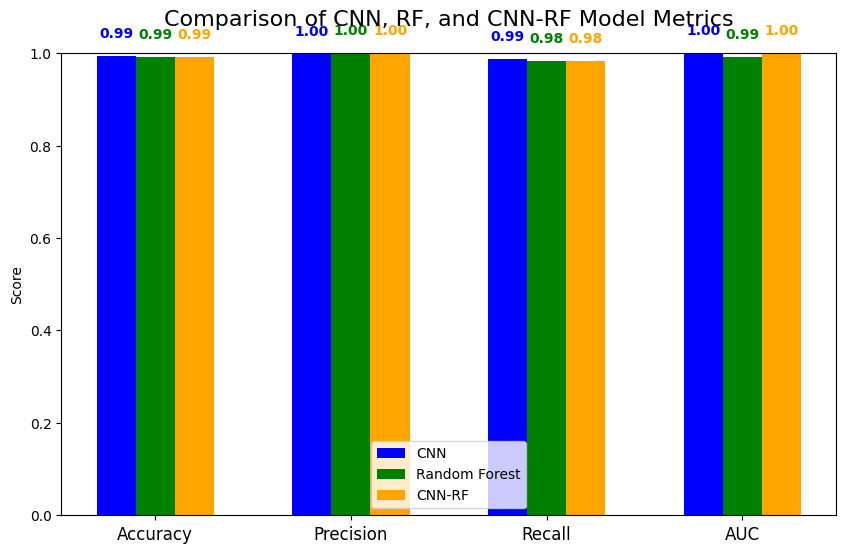

In [12]:
# ====================
# Compute Evaluation Metrics
# ====================

# CNN Metrics
cnn_precision = precision_score(y_test, (cnn_predictions > 0.5).astype(int))
cnn_recall = recall_score(y_test, (cnn_predictions > 0.5).astype(int))
cnn_auc = roc_auc_score(y_test, cnn_predictions)
cnn_accuracy = accuracy_score(y_test, (cnn_predictions > 0.5).astype(int))

# RF Metrics
rf_precision = precision_score(y_test[:1500], rf_predictions)
rf_recall = recall_score(y_test[:1500], rf_predictions)
rf_auc = roc_auc_score(y_test[:1500], rf_predictions)
rf_accuracy = accuracy_score(y_test[:1500], rf_predictions)

# CNN-RF Metrics
cnn_rf_precision = precision_score(y_test[:1500], (cnn_rf_predictions > 0.5).astype(int))
cnn_rf_recall = recall_score(y_test[:1500], (cnn_rf_predictions > 0.5).astype(int))
cnn_rf_auc = roc_auc_score(y_test[:1500], cnn_rf_predictions)
cnn_rf_accuracy = accuracy_score(y_test[:1500], (cnn_rf_predictions > 0.5).astype(int))

# ====================
# Plot Bar Chart for All Metrics
# ====================

# Define metrics and values
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, cnn_auc]
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_auc]
cnn_rf_values = [cnn_rf_accuracy, cnn_rf_precision, cnn_rf_recall, cnn_rf_auc]

# Bar width and positions
bar_width = 0.2
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(x - bar_width, cnn_values, width=bar_width, label='CNN', color='blue')
plt.bar(x, rf_values, width=bar_width, label='Random Forest', color='green')
plt.bar(x + bar_width, cnn_rf_values, width=bar_width, label='CNN-RF', color='orange')

# Labeling
plt.xticks(x, metrics, fontsize=12)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Comparison of CNN, RF, and CNN-RF Model Metrics', fontsize=16, pad=20)

plt.legend()



# Annotate bars with values
for i in range(len(metrics)):
    plt.text(i - bar_width, cnn_values[i] + 0.04, f'{cnn_values[i]:.2f}',
             ha='center', fontsize=10, fontweight='bold', color='blue')
    plt.text(i, rf_values[i] + 0.04, f'{rf_values[i]:.2f}',
             ha='center', fontsize=10, fontweight='bold', color='green')
    plt.text(i + bar_width, cnn_rf_values[i] + 0.04, f'{cnn_rf_values[i]:.2f}',
             ha='center', fontsize=10, fontweight='bold', color='orange')
plt.show()

